<a href="https://colab.research.google.com/github/AverYuchen/myFitRoom/blob/main/notebooks/generate_full_body_dress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Set up environment

In [ ]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion


In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
!pip install -r requirements.txt

In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip show huggingface_hub

Name: huggingface-hub
Version: 0.19.4
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, diffusers, gradio, gradio_client, peft, sentence-transformers, timm, tokenizers, transformers


In [ ]:
!pip show diffusers

Name: diffusers
Version: 0.24.0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The HuggingFace team
Author-email: patrick@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [ ]:
# !pip uninstall -y peft huggingface-hub diffusers
# # !pip uninstall -y peft huggingface-hub

# !pip install huggingface-hub==0.19.4
# !pip install diffusers==0.24.0
# !pip install peft==0.7.0

# 2. Text-to-image

In [ ]:
import torch
from diffusers import DiffusionPipeline
from IPython.display import display

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
# Load Previous Pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2", revision=None, variant=None, torch_dtype=torch.float32
)
pipeline = pipeline.to(device)

# Load attention processors
pipeline.unet.load_attn_procs("NouRed/sd-fashion-products")

# Run Inference
generator = torch.Generator(device=device)
seed = 42
if seed is not None:
    generator = generator.manual_seed(seed)

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/3.36M [00:00<?, ?B/s]

In [ ]:
prompt = "a red polka dot dress with a white background"
image = pipeline(prompt, num_inference_steps=30, generator=generator).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

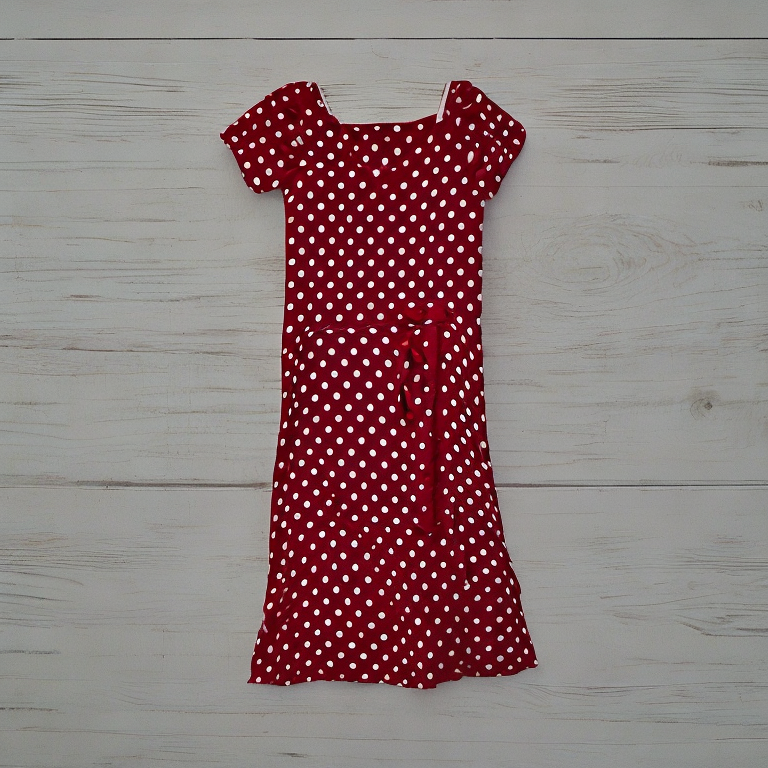

In [ ]:
display(image)

# 3. Compress image and save it

In [ ]:
from PIL import Image

# Cut size
width, height = image.size
new_size = (width // 2, height // 2)
resized_img = image.resize(new_size, Image.LANCZOS)

# Compress quality
save_path = '/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/polkda_dress3.jpg'
resized_img.save(save_path, 'JPEG', quality=50)

# 4. OOTDiffusion

In [ ]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion/run


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from IPython.display import Image, display

## half-body model

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/01861_00.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/peacock.jpg --scale 2.0 --sample 4 --save peacock

2024-12-10 18:21:12.181672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 18:21:12.203043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 18:21:12.209378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 18:21:13.497846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:01<00:00,  4.45it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which w

## full-body model
0-upperbody; 1-lowerbody; 2-dress

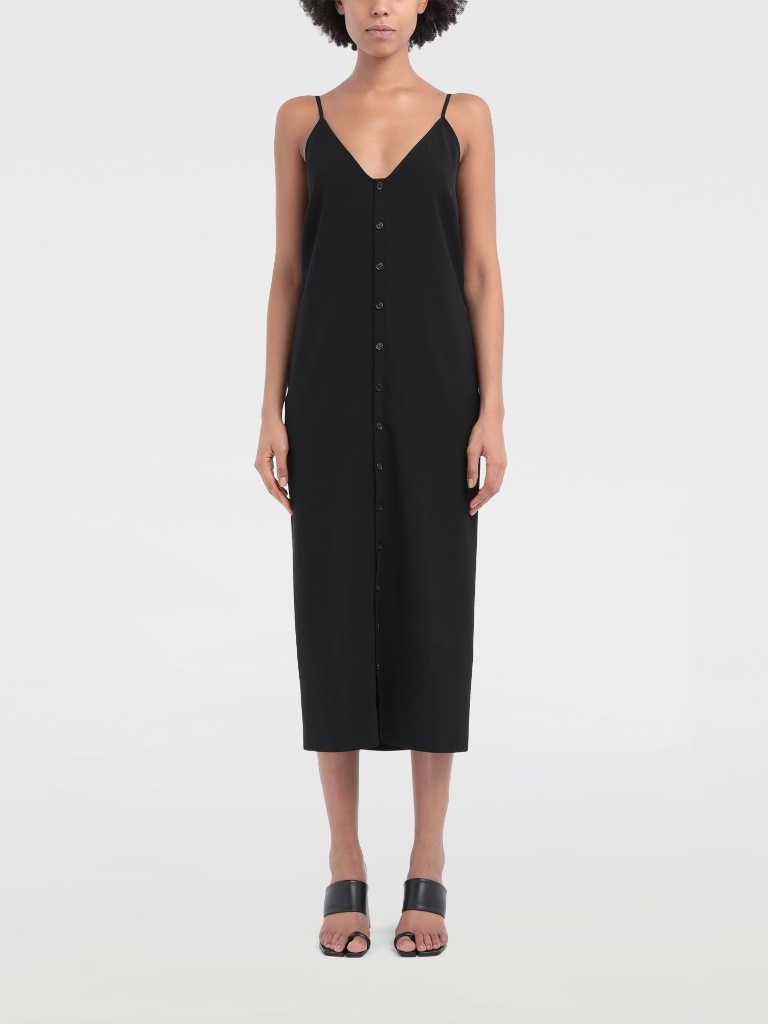

In [ ]:
display(Image('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/052472_0.jpg'))

In [ ]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/052472_0.jpg --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/save_images/polkda_dress3.jpg --scale 2.0 --sample 4 --save polkdaDress3 --model_type dc --category 2

2024-12-12 18:00:51.853975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 18:00:51.874806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 18:00:51.881153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 18:00:53.086005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:20<00:00,  2.94s/it]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which w

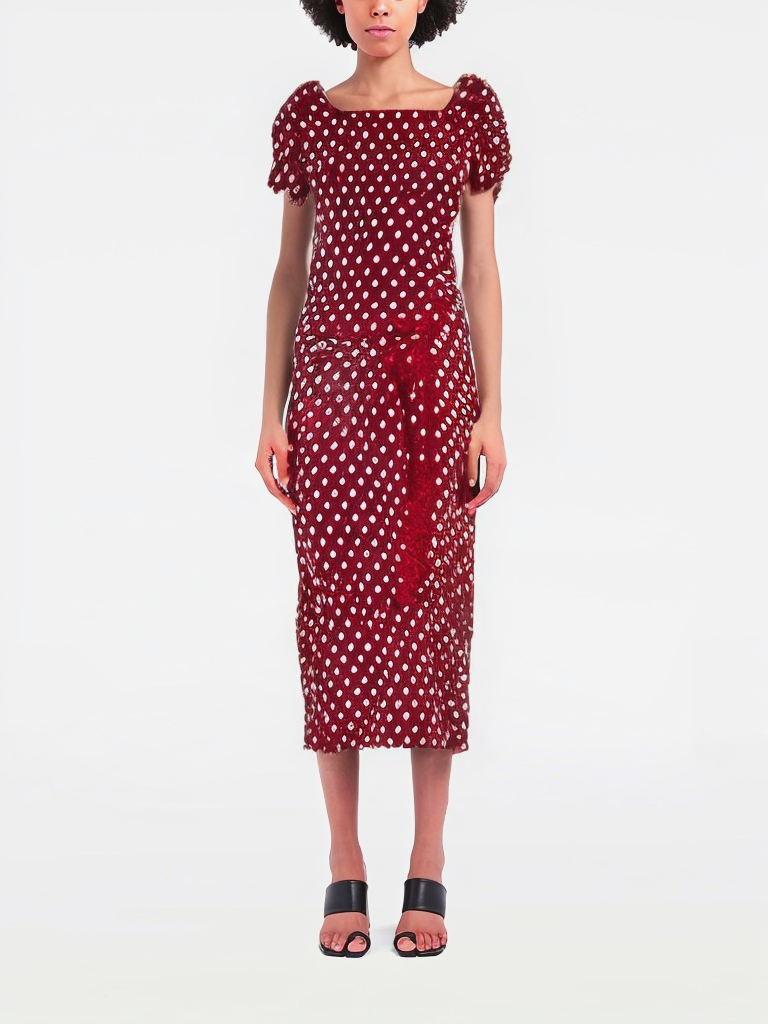

In [ ]:
display(Image('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/images_output/dc/polkdaDress3_out_dc_2.png'))